In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv(r"C:\Users\tejas\Downloads\FastagFraudDetection.csv")

In [65]:
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [66]:
df.shape

(5000, 13)

In [67]:
df.size

65000

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [69]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [70]:
df.dtypes

Transaction_ID            int64
Timestamp                object
Vehicle_Type             object
FastagID                 object
TollBoothID              object
Lane_Type                object
Vehicle_Dimensions       object
Transaction_Amount        int64
Amount_paid               int64
Geographical_Location    object
Vehicle_Speed             int64
Vehicle_Plate_Number     object
Fraud_indicator          object
dtype: object

# Data Preprocessing

In [71]:
df = df.drop_duplicates(keep = 'first')

In [72]:
df.shape

(5000, 13)

In [73]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [74]:
df.drop('FastagID',axis=1,inplace=True)

In [75]:
df

,Transaction_ID,Timestamp,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [76]:
df.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [77]:
df.drop('Transaction_ID',axis=1,inplace=True)

In [78]:
df.shape

(5000, 11)

In [79]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])

In [80]:
df

,Timestamp,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,2023-01-06 11:20:00,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2023-01-07 14:55:00,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,2023-01-08 18:25:00,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,2023-01-09 02:05:00,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,2023-01-10 06:35:00,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...
4995,2023-01-01 22:18:00,Truck,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,2023-01-17 13:43:00,Van,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,2023-02-05 05:08:00,Sedan,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,2023-02-20 20:34:00,SUV,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


# Data exploration and Visualization

In [81]:
df.describe()

,Timestamp,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000,5000.00000,5000.000000,5000.000000
mean,2023-06-13 06:32:39.756000,161.06200,141.261000,67.851200
min,2023-01-01 00:00:00,0.00000,0.000000,10.000000
25%,2023-03-14 02:42:00,100.00000,90.000000,54.000000
50%,2023-06-02 17:22:30,130.00000,120.000000,67.000000
75%,2023-09-08 08:06:45,290.00000,160.000000,82.000000
max,2023-12-31 21:45:00,350.00000,350.000000,118.000000
std,NaN,112.44995,106.480996,16.597547


In [82]:
corr = df[['Timestamp','Transaction_Amount','Amount_paid','Vehicle_Speed']].corr()

<Axes: >

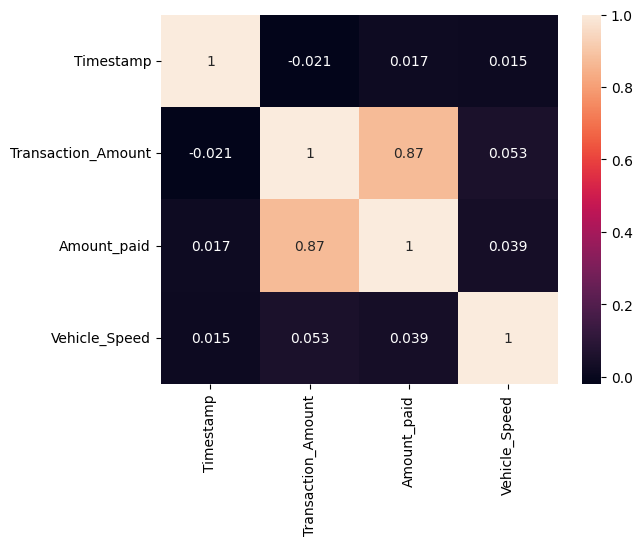

In [83]:
sns.heatmap(corr,annot=True)

In [84]:
df.columns

Index(['Timestamp', 'Vehicle_Type', 'TollBoothID', 'Lane_Type',
       'Vehicle_Dimensions', 'Transaction_Amount', 'Amount_paid',
       'Geographical_Location', 'Vehicle_Speed', 'Vehicle_Plate_Number',
       'Fraud_indicator'],
      dtype='object')

In [85]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

In [86]:
df['Vehicle_Type'].value_counts()

Vehicle_Type
Bus           716
Car           714
Motorcycle    714
Truck         714
Van           714
Sedan         714
SUV           714
Name: count, dtype: int64

<Axes: ylabel='Vehicle_Type'>

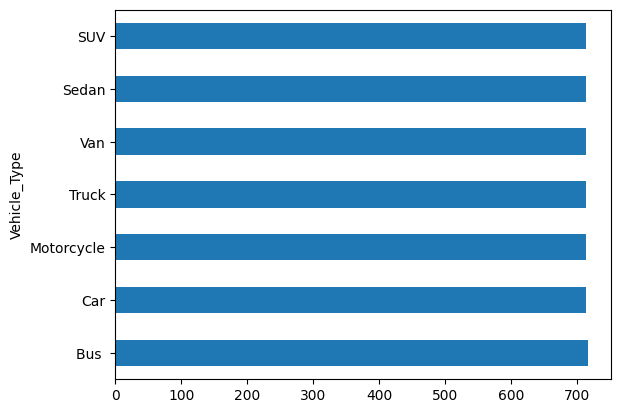

In [87]:
df['Vehicle_Type'].value_counts().plot(kind='barh')

In [88]:
df['Vehicle_Type'] = l.fit_transform(df['Vehicle_Type'])

In [89]:
df['TollBoothID'].value_counts()

TollBoothID
B-102    1432
A-101    1428
C-103    1426
D-106     570
D-105     104
D-104      40
Name: count, dtype: int64

<Axes: ylabel='TollBoothID'>

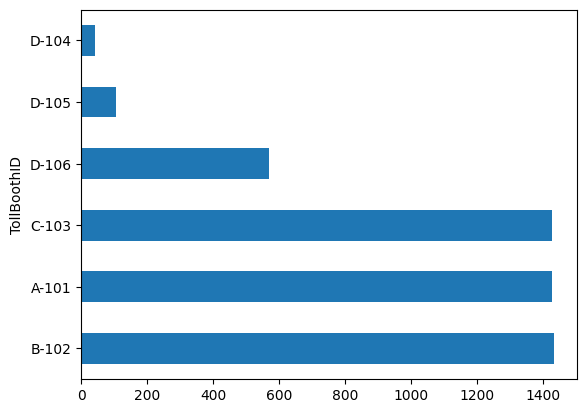

In [90]:
df['TollBoothID'].value_counts().plot(kind='barh')

In [91]:
df['TollBoothID'] = l.fit_transform(df['TollBoothID'])

In [92]:
df['Lane_Type'].value_counts()

Lane_Type
Regular    2858
Express    2142
Name: count, dtype: int64

<Axes: ylabel='Lane_Type'>

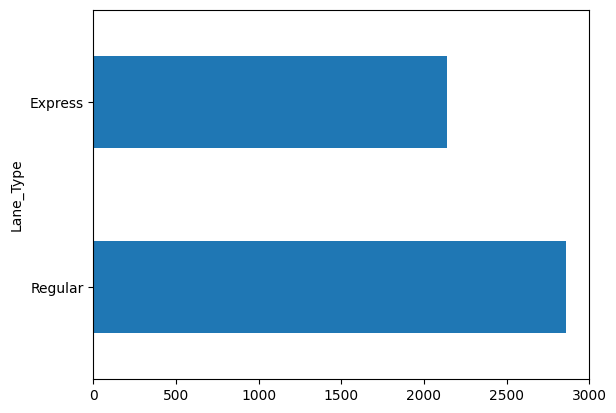

In [93]:
df["Lane_Type"].value_counts().plot(kind='barh')

In [94]:
df['Lane_Type'] = l.fit_transform(df['Lane_Type'])

In [95]:
df['Vehicle_Dimensions'].value_counts()

Vehicle_Dimensions
Large     2144
Small     1428
Medium    1428
Name: count, dtype: int64

<Axes: ylabel='Vehicle_Dimensions'>

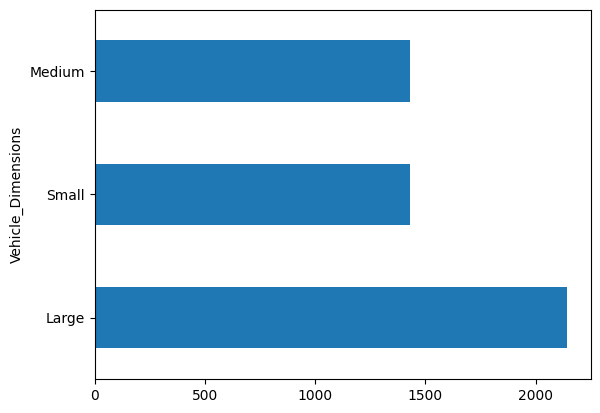

In [96]:
df['Vehicle_Dimensions'].value_counts().plot(kind='barh')

In [97]:
df['Vehicle_Dimensions'] = l.fit_transform(df['Vehicle_Dimensions'])

In [98]:
df['Fraud_indicator'].value_counts()

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64

<Axes: ylabel='Fraud_indicator'>

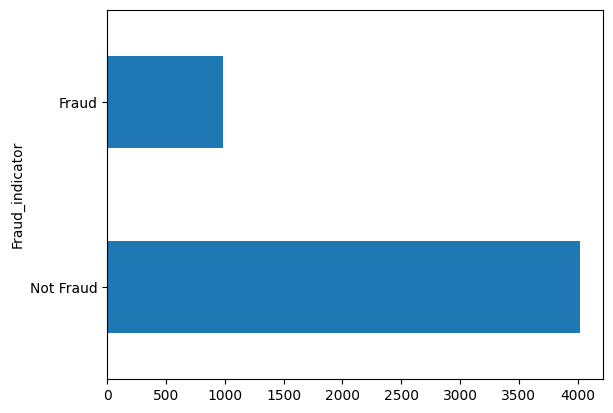

In [99]:
df['Fraud_indicator'].value_counts().plot(kind='barh')

In [100]:
df['Fraud_indicator'] = l.fit_transform(df['Fraud_indicator'])

In [101]:
df['Geographical_Location'].value_counts()

Geographical_Location
13.059816123454882, 77.77068662374292    1000
13.042660878688794, 77.47580097259879    1000
12.84197701525119, 77.67547528176169     1000
12.936687032945434, 77.53113977439017    1000
13.21331620748757, 77.55413526894684     1000
Name: count, dtype: int64

<Axes: ylabel='Geographical_Location'>

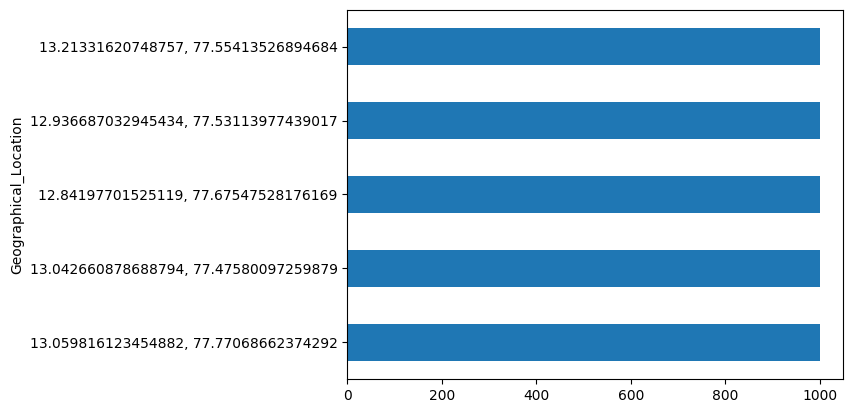

In [102]:
df['Geographical_Location'].value_counts().plot(kind='barh')

In [103]:
df['Geographical_Location'] = l.fit_transform(df['Geographical_Location'])

In [104]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [105]:
df['Timestamp'] = df['Timestamp'].dt.strftime('%H:%M')


In [106]:
df['Timestamp']

0       11:20
1       14:55
2       18:25
3       02:05
4       06:35
        ...  
4995    22:18
4996    13:43
4997    05:08
4998    20:34
4999    00:59
Name: Timestamp, Length: 5000, dtype: object

In [107]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%H:%M')


In [112]:
df['Window'] = (df['Timestamp'].dt.hour // 4) % 6

In [113]:
df['Window']

0       2
1       3
2       4
3       0
4       1
       ..
4995    5
4996    3
4997    1
4998    5
4999    0
Name: Window, Length: 5000, dtype: int32

In [115]:
df.drop('Timestamp',axis=1,inplace=True)

In [116]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [117]:
df['Transaction_Amount'] = s.fit_transform(df[['Transaction_Amount']])

In [118]:
df['Amount_paid'] = s.fit_transform(df[['Amount_paid']])

In [119]:
df['Vehicle_Speed'] = s.fit_transform(df[['Vehicle_Speed']])

In [120]:
df

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Window
0,0,0,0,0,1.680364,-0.199689,3,-0.171802,KA11AB1234,0,2
1,1,1,1,2,-0.365195,-0.387535,3,0.611525,KA66CD5678,0,3
2,2,3,1,2,-1.432443,-1.326764,3,-0.894872,KA88EF9012,1,4
3,5,2,1,0,1.680364,-0.199689,3,1.455108,KA11GH3456,0,0
4,6,1,0,1,-0.187320,-0.387535,3,-0.473081,KA44IJ6789,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,5,2,1,0,1.502490,1.772691,4,0.792293,KA74ST0123,1,5
4996,6,1,0,1,-0.320726,-0.152728,4,-0.232057,KA38UV3456,1,3
4997,4,0,1,1,-0.409663,-0.246651,4,1.515363,KA33WX6789,1,1
4998,3,1,0,0,-0.142851,0.035118,4,-0.653849,KA35YZ0123,1,5


In [121]:
df.drop('Vehicle_Plate_Number',axis=1,inplace=True)

In [122]:
df

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,Window
0,0,0,0,0,1.680364,-0.199689,3,-0.171802,0,2
1,1,1,1,2,-0.365195,-0.387535,3,0.611525,0,3
2,2,3,1,2,-1.432443,-1.326764,3,-0.894872,1,4
3,5,2,1,0,1.680364,-0.199689,3,1.455108,0,0
4,6,1,0,1,-0.187320,-0.387535,3,-0.473081,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,5,2,1,0,1.502490,1.772691,4,0.792293,1,5
4996,6,1,0,1,-0.320726,-0.152728,4,-0.232057,1,3
4997,4,0,1,1,-0.409663,-0.246651,4,1.515363,1,1
4998,3,1,0,0,-0.142851,0.035118,4,-0.653849,1,5


# Model development 

In [133]:
Y = np.array(df['Fraud_indicator'])
X = np.array(df[['Vehicle_Type','TollBoothID','Lane_Type','Vehicle_Dimensions','Transaction_Amount','Amount_paid','Vehicle_Speed','Window']])


In [134]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

### Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_pred = lr_model.predict(x_test)

In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       311
           1       0.95      1.00      0.98      1189

    accuracy                           0.96      1500
   macro avg       0.98      0.90      0.93      1500
weighted avg       0.96      0.96      0.96      1500



In [143]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy : ",accuracy_score(y_test,lr_pred))
print("Precision : ",precision_score(y_test,lr_pred))
print("Recall : ",recall_score(y_test,lr_pred))
print("f1 - score : ",f1_score(y_test,lr_pred))

Accuracy :  0.96
Precision :  0.9519615692554043
Recall :  1.0
f1 - score :  0.9753896636587367


<Axes: >

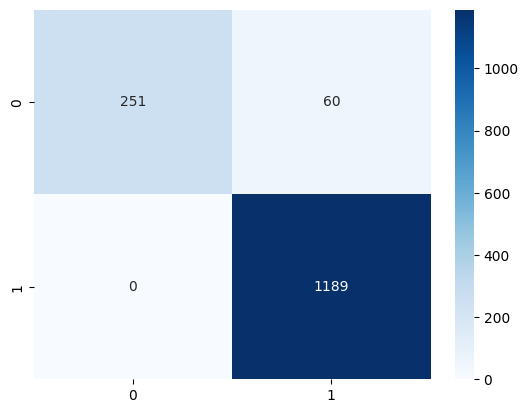

In [149]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,cmap='Blues',fmt='d')

### SVM

In [158]:
from sklearn.svm import SVC
s_model = SVC(kernel='linear')
s_model.fit(x_train,y_train)
s_pred = s_model.predict(x_test)

In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test,s_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       311
           1       0.98      1.00      0.99      1189

    accuracy                           0.98      1500
   macro avg       0.99      0.96      0.97      1500
weighted avg       0.98      0.98      0.98      1500



In [160]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy : ",accuracy_score(y_test,s_pred))
print("Precision : ",precision_score(y_test,s_pred))
print("Recall : ",recall_score(y_test,s_pred))
print("f1 - score : ",f1_score(y_test,s_pred))

Accuracy :  0.9826666666666667
Precision :  0.9786008230452675
Recall :  1.0
f1 - score :  0.9891846921797005


<Axes: >

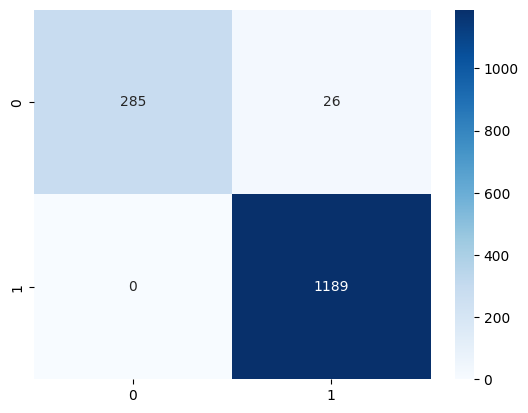

In [161]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,s_pred),annot=True,cmap='Blues',fmt='d')

### KNN

In [139]:
from sklearn.neighbors import KNeighborsClassifier
k_model = KNeighborsClassifier()
k_model.fit(x_train,y_train)
k_pred = k_model.predict(x_test)

In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_test,k_pred))

              precision    recall  f1-score   support

           0       0.96      0.56      0.70       311
           1       0.90      0.99      0.94      1189

    accuracy                           0.90      1500
   macro avg       0.93      0.78      0.82      1500
weighted avg       0.91      0.90      0.89      1500



In [145]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy : ",accuracy_score(y_test,k_pred))
print("Precision : ",precision_score(y_test,k_pred))
print("Recall : ",recall_score(y_test,k_pred))
print("f1 - score : ",f1_score(y_test,k_pred))

Accuracy :  0.9033333333333333
Precision :  0.8954545454545455
Recall :  0.9941126997476871
f1 - score :  0.9422080510163412


<Axes: >

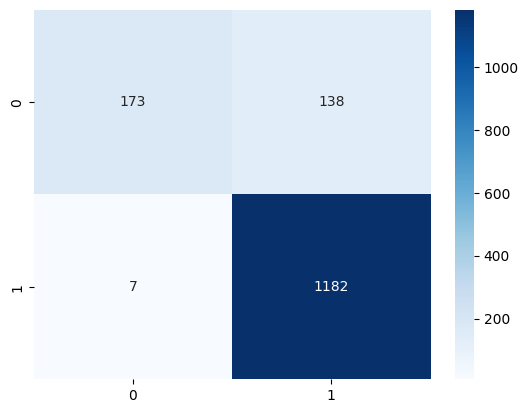

In [152]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,k_pred),annot=True,cmap='Blues',fmt='d')